![HACKTIV8](datasets/h8.png)

---
# Assignment 1

#### Gladis Hafifah
---

---
## Project Overview

Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12
---

---
## Import Library

In [1]:
# Import pustaka-pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

from wordcloud import WordCloud

## Data Loading

In [2]:
df = pd.read_csv('datasets/london_crime_by_lsoa.csv')

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df.shape

(13490604, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [8]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


---
## Visualisasi Data
---

---
### **Line Chart**
**Tentukan jumlah kasus kejahatan pada setiap tahunnya?**

In [9]:
crime_year=df.groupby('year')['value'].sum().reset_index()

In [10]:
crime_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


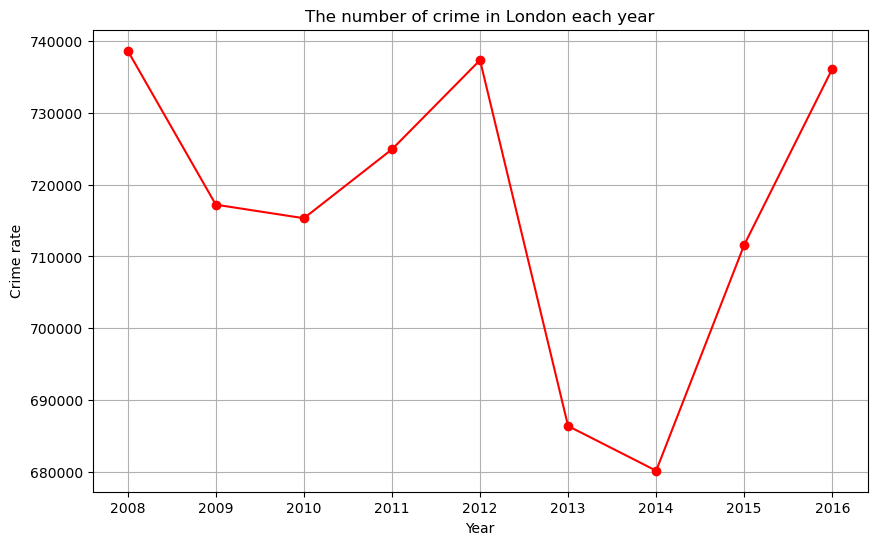

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(crime_year['year'], crime_year['value'], marker='o', linestyle='-', color='red')
plt.title('The number of crime in London each year')
plt.xlabel('Year')
plt.ylabel('Crime rate')
plt.grid(True)

plt.show()


**Insight :**

- Tahun 2008 adalah tahun yang memiliki kasus kejahatan tertinggi sebanyak 738641 kasus kejahatan.
- Tahun 2014 merupakan tahun yang memiliki kasus kejahatan terendah dibandingkan tahun tahun lainnya dengan 680183 kasus kejahatan.
- pada 2 tahun terakhir yaitu pada tahun 2015 dan 2016 kasus kejahatan di london kembali melonjak tinggi.

---

---
### **Histogram**
**Bagaimana frekuensi jumlah kota dan jumlah kriminalitas yang ada pada tahun 2008-2016?**


In [12]:
columns = ['major_category','minor_category','month','year']
df_total_crime=df.drop(columns, axis=1)
df_total_crime=df_total_crime.groupby('borough').sum()

df_total_crime.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15272\2390765776.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total_crime=df_total_crime.groupby('borough').sum()


,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [13]:
count, bin_edges = np.histogram(df_total_crime)

print(count)
print(bin_edges)

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


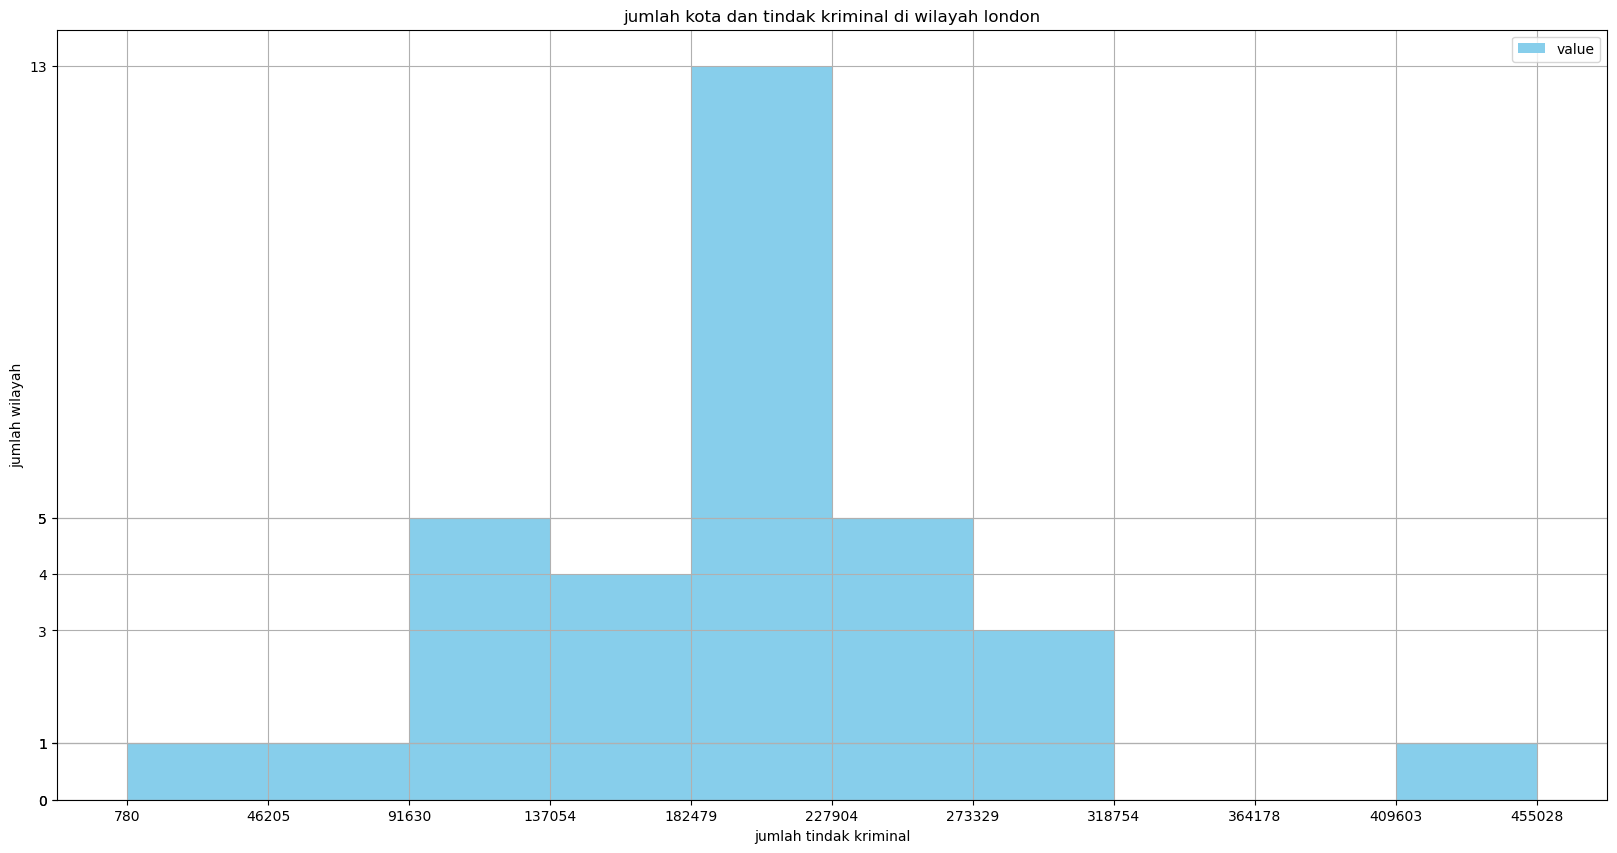

In [35]:
df_total_crime.plot(kind='hist', figsize=(20,10), xticks=bin_edges, yticks=count, color='skyblue')
plt.title('jumlah kota dan tindak kriminal di wilayah london')
plt.xlabel('jumlah tindak kriminal')
plt.ylabel('jumlah wilayah')
plt.grid(True)

plt.show()

**Insight**

- 1 wilayah memliki frekuensi tindak kriminal sekitar 780 - 46204.8
- 1 wilayah memliki frekuensi tindak kriminal sekitar 46204.8 - 91629.6
- 5 wilayah memliki frekuensi tindak kriminal sekitar 91629.6 - 137054.4
- 4 wilayah memliki frekuensi tindak kriminal sekitar 137054.4 - 182479.2
- 13 wilayah memliki frekuensi tindak kriminal sekitar 182479.2 - 227904.
- 5 wilayah memliki frekuensi tindak kriminal sekitar 227904. - 273328.8
- 3 wilayah memliki frekuensi tindak kriminal sekitar 273328.8 - 318753.6
- 1 wilayah memliki frekuensi tindak kriminal sekitar 409603.2 - 455028.


---





---
### **Bar Chart**
**Berikan 5 wilayah(borough) di london yang memiliki jumlah kejahatan tertinggi pada tahun 2008-2016!**

In [15]:
crime_borough=df.groupby('borough')['value'].sum().reset_index()
top5_borough= crime_borough.sort_values(by='value', ascending=False).head()

In [16]:
top5_borough

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024


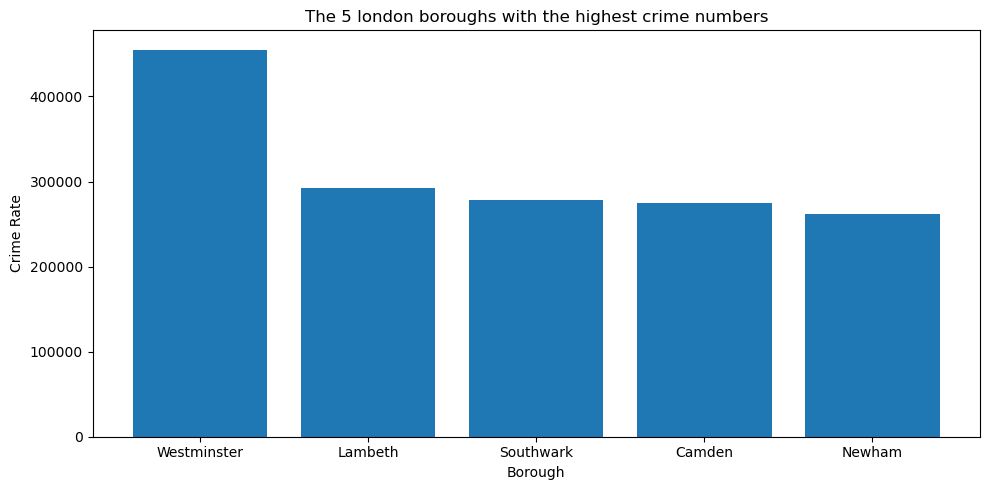

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(top5_borough['borough'], top5_borough['value'])
plt.title('The 5 london boroughs with the highest crime numbers')
plt.xlabel('Borough')
plt.ylabel('Crime Rate')

plt.tight_layout()
plt.show()

**Insight**

- wilayah westminster merupakan wilayah penyumbang kejahatan tertinggi di london dengan 4845 kasus.  
- wilayah lambeth merupakan wilayah yang sering terjadi kejahatan dengan 32071 kasus.
- wilayah Southwark merupakan wilayah yang sering terjadi kejahatan dengan 31339 kasus.
- wilayah camben merupakan wilayah yang sering terjadi kejahatan dengan 30093 kasus.
- wilayah newham merupakan wilayah yang sering terjadi kejahatan dengan 29370 kasus.

---

---
### **Area**
**Mengetahui jenis kriminalitas apa saja yang terjadi di wilayah Westminster?**

In [18]:
westminster_data = df[df['borough'] == 'Westminster']

In [19]:
crime_counts = westminster_data.groupby(['year', 'major_category'])['value'].sum().unstack(fill_value=0)

In [20]:
crime_counts

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,2962,2599,4075,273,588,1327,59,29266,6697
2009,2957,2564,3894,0,611,1410,0,29967,7053
2010,2682,2385,4632,0,660,1439,0,29191,7127
2011,2900,2246,5670,0,652,1814,0,33529,7432
2012,4083,2254,4654,0,641,2312,0,38152,7130
2013,3906,2080,4151,0,762,2198,0,33868,6887
2014,3435,2016,2804,0,800,1933,0,28144,8432
2015,3152,2082,2102,0,726,1497,0,27980,9856
2016,3218,2179,2049,0,708,1822,0,27520,10834


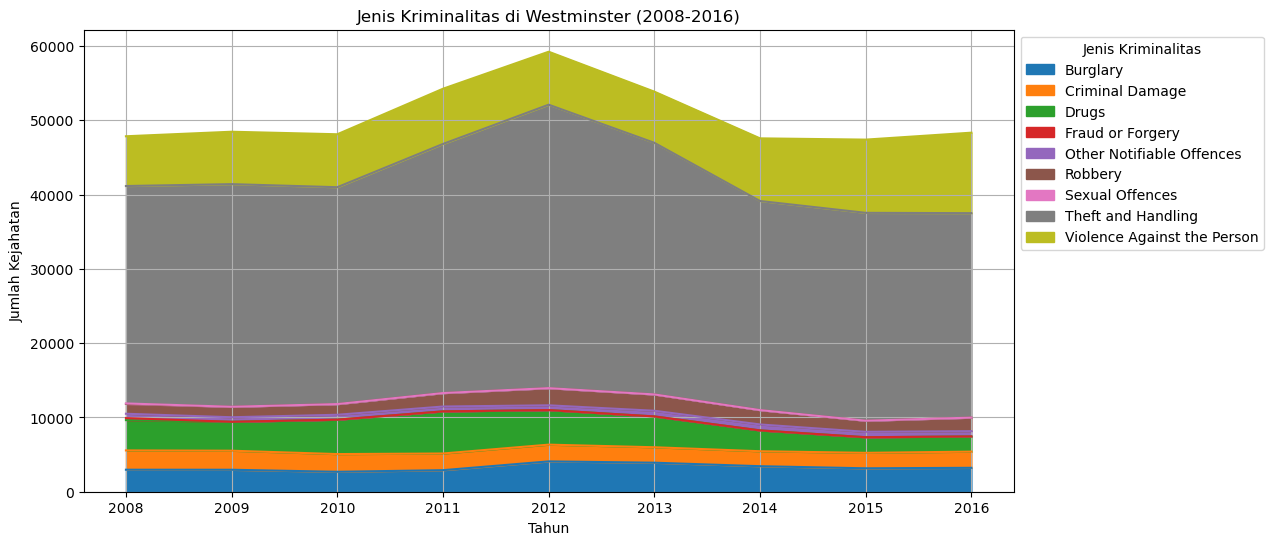

In [21]:
crime_counts.plot(kind='area', figsize=(12, 6), stacked=True)
plt.title('Jenis Kriminalitas di Westminster (2008-2016)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.grid(True)
plt.legend(title='Jenis Kriminalitas', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Insight**

- Pada tahun 2012 seluruh jenis kejahatan meningkat di distrik westminster 
- Terdapat 9 jenis kasus yang terjadi di distrik westminster yaitu burglary, criminal damage, drugs, fraud or forgery, other notifiable offences, robbery, sexual offences, theft and handling, dan violence against the person.
- Jenis kejahatan yang sering terjadi di distrik westminster yaitu violence against the person.

---

---
### **Box Plot**
**Bagaimana statistik dari data jumlah tindak kriminal di wilayah Westminster pada tahun 2008 - 2016?**

In [22]:
# menunjukkan data di wilayah Westminster
df_borough_Westminster = df[df["borough"] == 'Westminster']
df_borough_Westminster.sort_values(['value'], ascending=False, axis=0, inplace=True)

df_borough_Westminster.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15272\37359868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borough_Westminster.sort_values(['value'], ascending=False, axis=0, inplace=True)


,lsoa_code,borough,major_category,minor_category,value,year,month
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12


In [23]:
dfcrime_Westminster = df_borough_Westminster[['year', 'value']].groupby(['year']).agg({'value': 'sum'}) #mengelompokan data year dan value berdasarkan year

dfcrime_Westminster.reset_index() #riset index

,year,value
0,2008,47846
1,2009,48456
2,2010,48116
3,2011,54243
4,2012,59226
5,2013,53852
6,2014,47564
7,2015,47395
8,2016,48330


In [24]:
dfcrime_Westminster.describe()

,value
count,9.000000
mean,50558.666667
std,4201.683918
min,47395.000000
25%,47846.000000
50%,48330.000000
75%,53852.000000
max,59226.000000


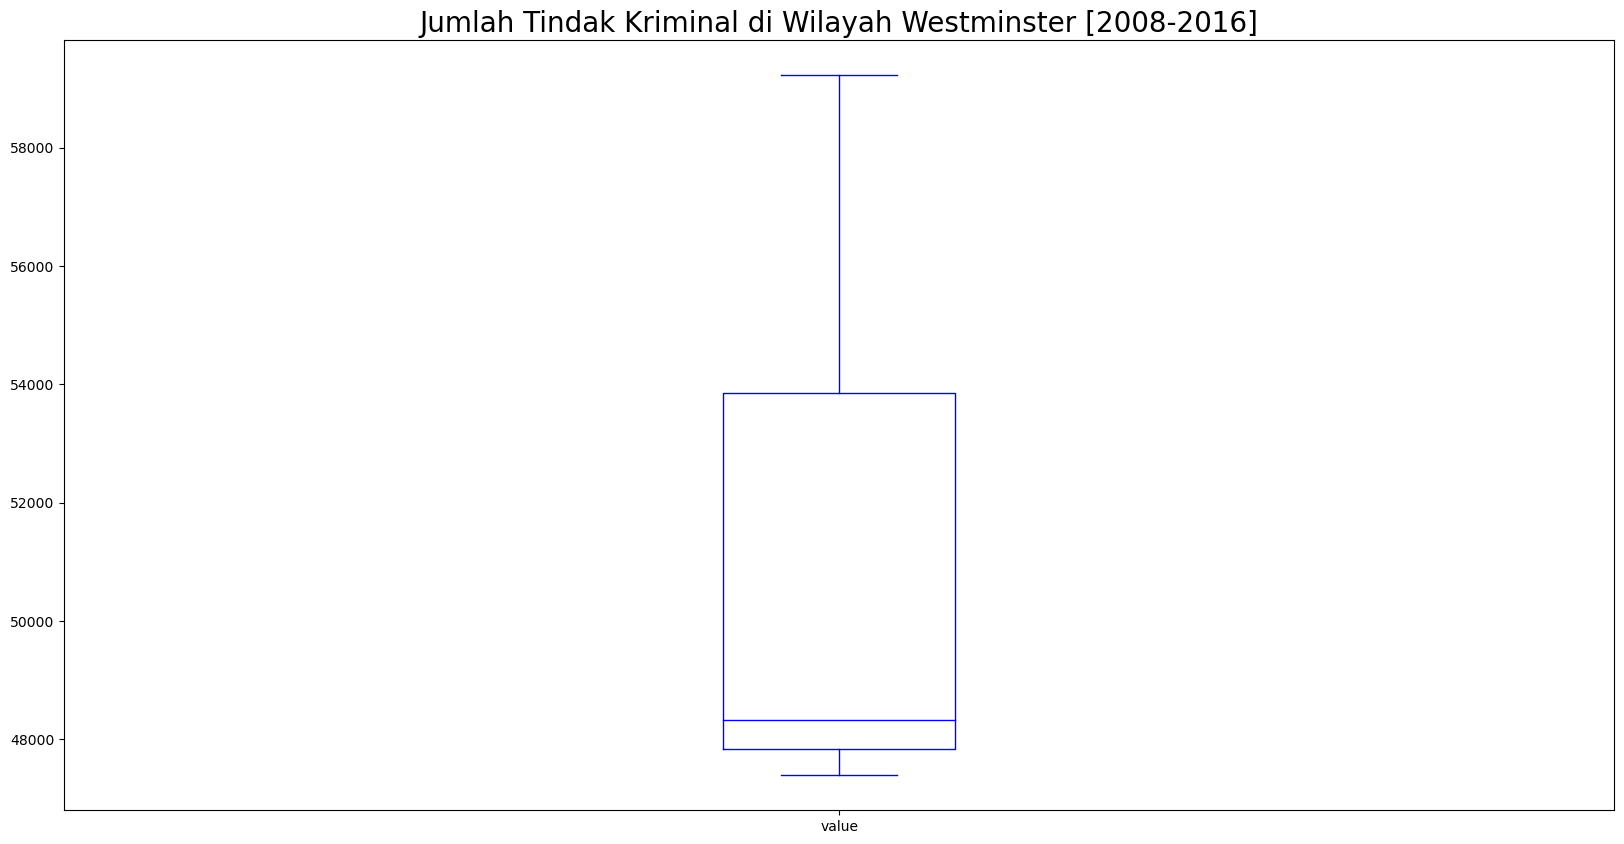

In [25]:
dfcrime_Westminster.plot(kind="box",
                figsize=(20,10),
                color = "blue")

plt.title("Jumlah Tindak Kriminal di Wilayah Westminster [2008-2016]", fontsize=20)

plt.show()

**Insight**

- Jumlah tindak kriminalitas di distrik westminster pada periode 2008 - 2016 diantara sekitar 47395 hingga 59226 dengan rata rata 50558.666667.

---

---
### **Scatter Plot**
**bagaimana pesebaran total kriminalitas di wilayah westminster pada setiap tahunnya?**

In [3]:
# Filter data untuk Borough Westminster
westminster_crimes = df[df['borough'] == 'Westminster']

In [11]:
# Mengelompokkan data berdasarkan kode LSOA dan menghitung total kriminalitas
crime_totals = westminster_crimes.groupby(['major_category'])['value'].sum().reset_index()

In [12]:
crime_totals

,major_category,value
0,Burglary,29295
1,Criminal Damage,20405
2,Drugs,34031
3,Fraud or Forgery,273
4,Other Notifiable Offences,6148
5,Robbery,15752
6,Sexual Offences,59
7,Theft and Handling,277617
8,Violence Against the Person,71448


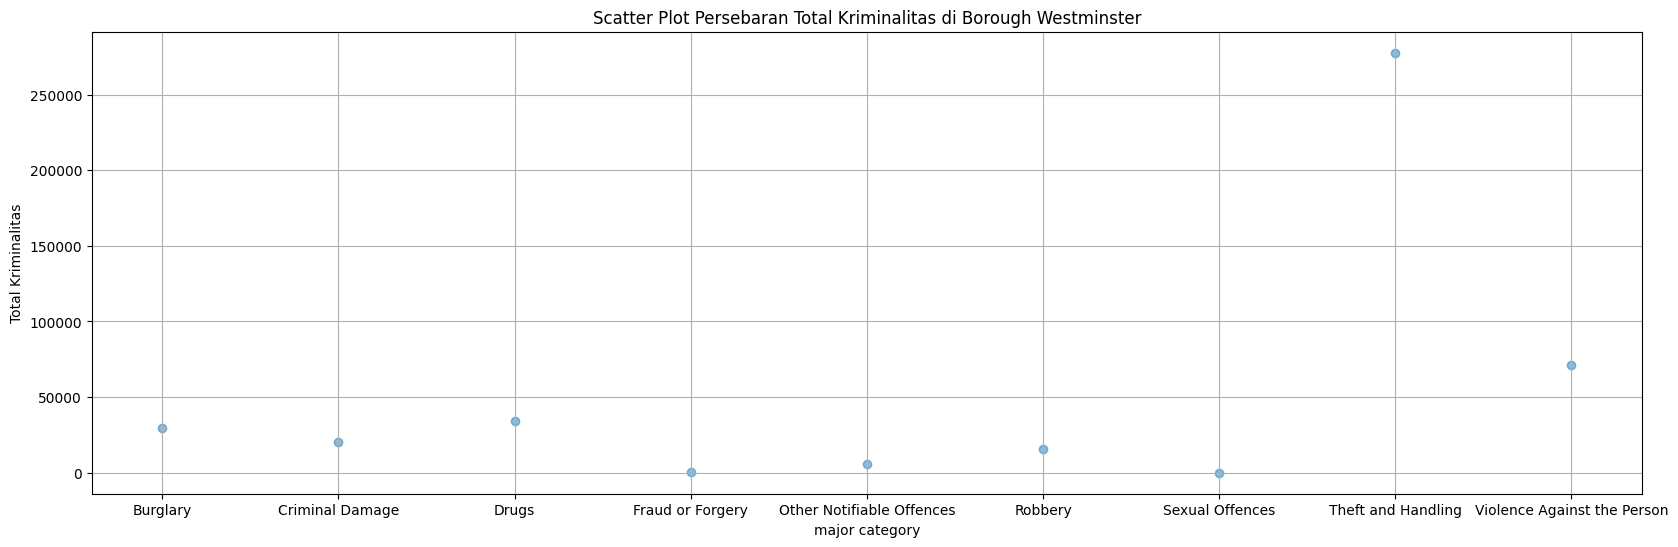

In [14]:
# Membuat scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(crime_totals['major_category'], crime_totals['value'], alpha=0.5)
plt.xlabel('major category')
plt.ylabel('Total Kriminalitas')
plt.title('Scatter Plot Persebaran Total Kriminalitas di Borough Westminster')
plt.grid(True)

plt.show()

**Insight**

- jenis kejahatan theft and handling merupakan pesebaran total kriminalitas tertinggi
- jenis kejahatan fraoud or forgery dan sexual offences merupakan persebaran total kriminalitas terendah
---

---
### **WordCloud**
**Jenis Kejahatan apa saja yang terjadi berdasarkan minor category pada tahun 2008-2016 di london?**

In [30]:
df_filtered = df[(df['year'] >= 2008) & (df['year'] <= 2016)] #memfilter data dari tahun 2008-2016

words = " ".join(word for word in df_filtered['minor_category']) #menggabungkan kolom minor category menjadi satu text


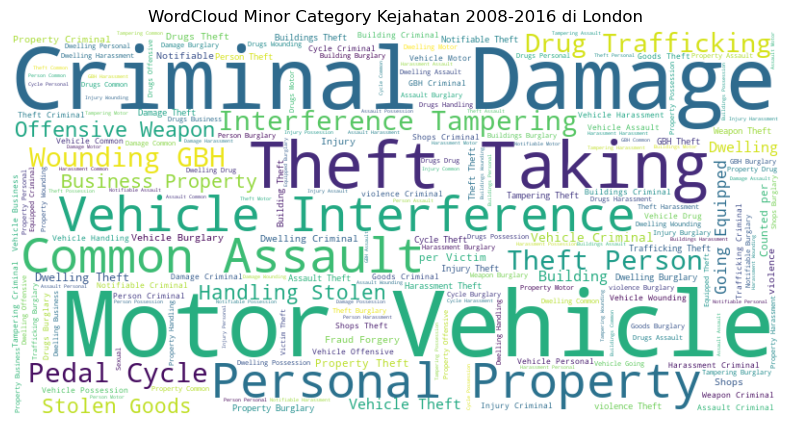

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Minor Category Kejahatan 2008-2016 di London')
plt.show()


---

---
### **Folium Map**

In [20]:
# Koordinat geografis Westminster
westminster_coords = [51.4975, -0.1357]  # Contoh koordinat, ganti sesuai dengan data yang sesungguhnya

# Membuat peta awal
m = folium.Map(location=westminster_coords, zoom_start=14)  # Sesuaikan zoom sesuai kebutuhan

# Menambahkan tanda merah pada wilayah Westminster
folium.Marker(
    location=westminster_coords,
    popup="Westminster",
    icon=folium.Icon(color='red')
).add_to(m)

# Menampilkan peta
m